In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_excel(r"C:\Users\Sunil Kamat\Downloads\Student - Teacher Feedback (Responses).xlsx")

In [5]:
df

,Timestamp,Email address,Student Name,Do you or your child enjoy coming to class?,How much did you enjoy music this month?,How do you like your teachers approach ? (Lesson Plan),Is your teacher resourceful?,How confident do you feel about the music you learned this month?,Are you satisfied?,"If No, please state your reasons"
0,2025-08-23 09:36:14.547,karthikeyan.rajarathinam@gmail.com,Samyukta k,Yes,4,5,Yes,4,Yes,NaN
1,2025-08-23 10:11:26.706,arnabcal91@gmail.com,Adrija Kundu,Yes,5,5,Yes,4,Yes,NaN
2,2025-08-23 11:46:25.468,shah.vaibhav@gmail.com,Hiyaan Shah,Yes,4,5,Yes,5,Yes,We are very happy with how Hiyaan is learning....
3,2025-08-23 14:45:59.374,anjusudhakar@gmail.com,Ishay Reddy,Yes,4,5,Yes,4,Yes,NaN
4,2025-08-23 15:43:51.514,harshitreddy68@gmail.com,Harshitreddy,Yes,4,4,Yes,3,Yes,NaN
5,2025-08-23 19:36:09.693,lavneeshsaini225@gmail.com,LAVISH SAINI,Yes,4,4,Yes,5,Yes,Nil
6,2025-08-23 22:32:46.090,gadvejyoti@gmail.com,Adithri Holkar,Yes,4,4,Yes,3,Yes,Daughter is just 6yrs so she will learn slowly...
7,2025-08-23 23:51:42.727,cutsmartprem@gmail.com,Tanmaya Premnath,Yes,3,4,Yes,4,Yes,NaN
8,2025-08-24 07:45:52.965,tanishabose.tb@gmail.com,Tanisha Bose,Yes,4,4,Yes,5,Yes,NaN
9,2025-08-24 09:34:36.210,badhri79@gmail.com,Badhrinarayanan Srinivasan,Yes,5,5,Yes,5,Yes,NaN


In [13]:
df['Are you satisfied?'].value_counts()

Are you satisfied?
Yes    16
No      1
Name: count, dtype: int64

In [19]:
df['Are you satisfied?'] = df['Are you satisfied?'].map({'No':0,'Yes':1})

In [23]:
pd.crosstab(
    index=df['Are you satisfied?'],
    columns=df['How much did you enjoy music this month?'],
    values=df['How do you like your teachers approach ? (Lesson Plan)'],
    aggfunc='mean',
    rownames=['Are you satisfied?'],
    colnames=['How much did you enjoy music this month?']
)

How much did you enjoy music this month?,3,4,5
Are you satisfied?,,,
0,4.0,NaN,NaN
1,4.0,4.428571,5.0


In [29]:
rating_cols = ['How much did you enjoy music this month?', 'How do you like your teachers approach ? (Lesson Plan)', 'How confident do you feel about the music you learned this month?']
high_rating_failures = df[(df[rating_cols].mean(axis=1) >= 3) & (df['Are you satisfied?'] == 0)]
high_rating_failures

,Timestamp,Email address,Student Name,Do you or your child enjoy coming to class?,How much did you enjoy music this month?,How do you like your teachers approach ? (Lesson Plan),Is your teacher resourceful?,How confident do you feel about the music you learned this month?,Are you satisfied?,"If No, please state your reasons"
16,2025-09-02 23:32:36.380,siddalingjadgijadgi@gmail.com,Shrihari,Maybe,3,4,Yes,3,0,My son is not upto the standard as i am expect...


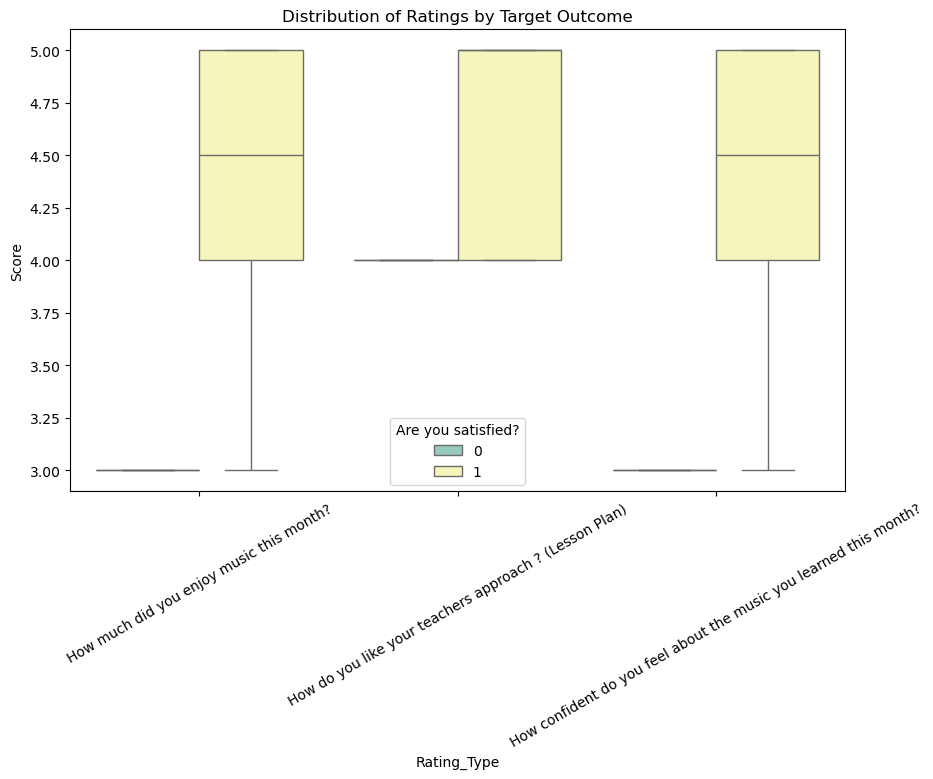

In [33]:
plt.figure(figsize=(10, 6))
melted_df = df.melt(id_vars=['Are you satisfied?'], 
                    value_vars=rating_cols, 
                    var_name='Rating_Type', 
                    value_name='Score')
sns.boxplot(data=melted_df, x='Rating_Type', y='Score', hue='Are you satisfied?', palette='Set3')
plt.title("Distribution of Ratings by Target Outcome")
plt.xticks(rotation=30)
plt.show()

In [35]:
rating_cols = ['How much did you enjoy music this month?', 'How do you like your teachers approach ? (Lesson Plan)', 'How confident do you feel about the music you learned this month?']
high_rating_success = df[(df[rating_cols].mean(axis=1) >= 3) & (df['Are you satisfied?'] == 1)]
high_rating_success

,Timestamp,Email address,Student Name,Do you or your child enjoy coming to class?,How much did you enjoy music this month?,How do you like your teachers approach ? (Lesson Plan),Is your teacher resourceful?,How confident do you feel about the music you learned this month?,Are you satisfied?,"If No, please state your reasons"
0,2025-08-23 09:36:14.547,karthikeyan.rajarathinam@gmail.com,Samyukta k,Yes,4,5,Yes,4,1,NaN
1,2025-08-23 10:11:26.706,arnabcal91@gmail.com,Adrija Kundu,Yes,5,5,Yes,4,1,NaN
2,2025-08-23 11:46:25.468,shah.vaibhav@gmail.com,Hiyaan Shah,Yes,4,5,Yes,5,1,We are very happy with how Hiyaan is learning....
3,2025-08-23 14:45:59.374,anjusudhakar@gmail.com,Ishay Reddy,Yes,4,5,Yes,4,1,NaN
4,2025-08-23 15:43:51.514,harshitreddy68@gmail.com,Harshitreddy,Yes,4,4,Yes,3,1,NaN
5,2025-08-23 19:36:09.693,lavneeshsaini225@gmail.com,LAVISH SAINI,Yes,4,4,Yes,5,1,Nil
6,2025-08-23 22:32:46.090,gadvejyoti@gmail.com,Adithri Holkar,Yes,4,4,Yes,3,1,Daughter is just 6yrs so she will learn slowly...
7,2025-08-23 23:51:42.727,cutsmartprem@gmail.com,Tanmaya Premnath,Yes,3,4,Yes,4,1,NaN
8,2025-08-24 07:45:52.965,tanishabose.tb@gmail.com,Tanisha Bose,Yes,4,4,Yes,5,1,NaN
9,2025-08-24 09:34:36.210,badhri79@gmail.com,Badhrinarayanan Srinivasan,Yes,5,5,Yes,5,1,NaN


In [41]:
high_rating_success['avg_rating'] = high_rating_success[rating_cols].mean(axis=1)
best_performer = high_rating_success.loc[
    high_rating_success['avg_rating'].idxmax()
]
best_performer

C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9948\2924022100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rating_success['avg_rating'] = high_rating_success[rating_cols].mean(axis=1)


Timestamp                                                             2025-08-24 09:34:36.210000
Email address                                                                 badhri79@gmail.com
Student Name                                                         Badhrinarayanan Srinivasan 
Do you or your child enjoy coming to class?                                                  Yes
How much did you enjoy music this month?                                                       5
How do you like your teachers approach ? (Lesson Plan)                                         5
Is your teacher resourceful?                                                                 Yes
How confident do you feel about the music you learned this month?                              5
Are you satisfied?                                                                             1
If No, please state your reasons                                                             NaN
avg_rating                    

In [43]:
df.columns

Index(['Timestamp', 'Email address', 'Student Name',
       'Do you or your child enjoy coming to class?',
       'How much did you enjoy music this month?',
       'How do you like your teachers approach ? (Lesson Plan)',
       'Is your teacher resourceful?',
       'How confident do you feel about the music you learned this month?',
       'Are you satisfied?', 'If No, please state your reasons'],
      dtype='object')